### Задание 1

Импортируйте библиотеки **pandas, numpy и matplotlib**. Загрузите `"Boston House Prices dataset"` из встроенных наборов данных библиотеки **sklearn**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

Создайте датафреймы **X** и **y** из этих данных.
Разбейте эти датафреймы на тренировочные **(X_train, y_train)** и тестовые **(X_test, y_test)**
с помощью функции **train_test_split** так, чтобы размер тестовой выборки
составлял **20%** от всех данных, при этом аргумент `random_state` должен быть равен **42**.
Масштабируйте данные с помощью `StandardScaler`.
Постройте модель TSNE на тренировочный данных с параметрами:
**n_components=2, learning_rate=250, random_state=42**.
Постройте диаграмму рассеяния на этих данных.

In [43]:
data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['price'])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

In [52]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [53]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

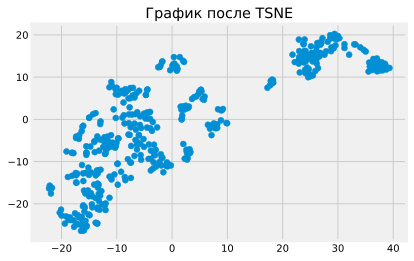

In [114]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], label='Точки')
plt.title('График после TSNE')
plt.show()

### Задание 2
С помощью **KMeans** разбейте данные из тренировочного набора на **3 кластера**,
используйте все признаки из датафрейма `X_train`.
Параметр `max_iter` должен быть равен **100**, `random_state` сделайте равным **42**.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью `TSNE`,
и раскрасьте точки из разных кластеров разными цветами.

In [83]:
kmean = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [84]:
train_labels = kmean.fit_predict(X_train_scaled)

In [85]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

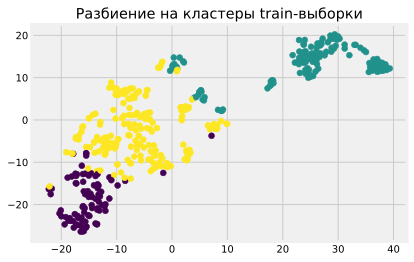

In [119]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.title('Разбиение на кластеры train-выборки')
plt.show()

Вычислите средние значения `price` и `CRIM`в разных кластерах.

### Среднее значение признака `CRIM` по каждому кластеру:

In [74]:
X_train.loc[train_labels == 0, 'CRIM'].mean()

0.07356558139534884

In [75]:
X_train.loc[train_labels == 1, 'CRIM'].mean()

10.797028425196851

In [76]:
X_train.loc[train_labels == 2, 'CRIM'].mean()

0.4216602094240837

### Среднее значение признака `price` по каждому кластеру:

In [80]:
y_train.loc[train_labels == 0, 'price'].mean()

27.78837209302326

In [81]:
y_train.loc[train_labels == 1, 'price'].mean()

16.165354330708663

In [82]:
y_train.loc[train_labels == 2, 'price'].mean()

24.958115183246072

### *Задание 3
Примените модель **KMeans**, построенную в предыдущем задании,
к данным из тестового набора.

In [94]:
test_labels = kmean.fit_predict(X_test_scaled)

In [101]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

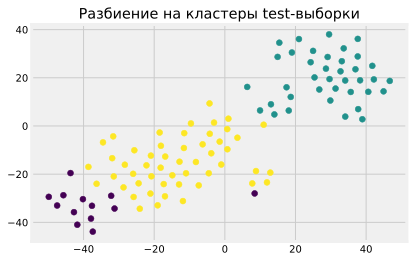

In [118]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)
plt.title('Разбиение на кластеры test-выборки')
plt.show()

Вычислите средние значения `price` и `CRIM`в разных кластерах на тестовых данных.

### Среднее значение признака `CRIM` по каждому кластеру:

In [95]:
X_test.loc[test_labels == 0, 'CRIM'].mean()

0.0830846153846154

In [96]:
X_test.loc[test_labels == 1, 'CRIM'].mean()

9.419181842105264

In [97]:
X_test.loc[test_labels == 2, 'CRIM'].mean()

0.22250117647058823

### Среднее значение признака `price` по каждому кластеру:

In [98]:
y_test.loc[test_labels == 0, 'price'].mean()

34.55384615384616

In [99]:
y_test.loc[test_labels == 1, 'price'].mean()

16.710526315789473

In [100]:
y_test.loc[test_labels == 2, 'price'].mean()

21.71764705882353